In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [6]:
df = pd.read_csv('cleaned_data.csv')

In [7]:
df[['order_load_date','order_unload_date', 'order_create_date']] = df[['order_load_date','order_unload_date', 'order_create_date']].apply(pd.to_datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233016 entries, 0 to 233015
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   debtor              233016 non-null  int64         
 1   ordernr             233016 non-null  int64         
 2   volgnr              233016 non-null  int64         
 3   order_load_date     233016 non-null  datetime64[ns]
 4   order_unload_date   233016 non-null  datetime64[ns]
 5   order_create_date   233016 non-null  datetime64[ns]
 6   order_create_time   233016 non-null  object        
 7   ritsoort            233016 non-null  object        
 8   order_kind          233016 non-null  object        
 9   order_dep           233016 non-null  object        
 10  order_size          233016 non-null  float64       
 11  order_weight        233016 non-null  float64       
 12  order_class         233016 non-null  object        
 13  order_class_size    233016 no

In [9]:
df = df[['order_load_date','order_size']]

In [10]:
df_1 = df.copy()

In [11]:
def date_features(df):
    #Date features
    df['year'] = df.order_load_date.dt.year
    df['month'] = df.order_load_date.dt.month
    df['day'] = df.order_load_date.dt.day
    df['day_of_year'] = df.order_load_date.dt.dayofyear
    df['day_of_week'] = df.order_load_date.dt.isocalendar().day
    df['week_of_year'] = df.order_load_date.dt.isocalendar().week
    
    # Additionnal Data Features
    df['day^year'] = np.log((np.log(df['day_of_year'] + 1)) ** (df['year'] - 2000))
    
    #Drop transfered date column
    df = df.drop('order_load_date', axis=1)
    
    return df

In [12]:
#Transform data with new features
df_1 = date_features(df_1)

In [13]:
# Daily Average, Monthly Average for train
df_1['daily_avg'] = df_1.groupby('day_of_week')['order_size'].transform('mean')
df_1['monthly_avg'] = df_1.groupby('month')['order_size'].transform('mean')

In [14]:
#Rolling average over 10 days
df_1['order_size'].rolling(10).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
233011    0.455
233012    0.515
233013    0.485
233014    0.445
233015    0.465
Name: order_size, Length: 233016, dtype: float64

In [15]:
# create correlation
corr = df_1.corr()

<AxesSubplot:>

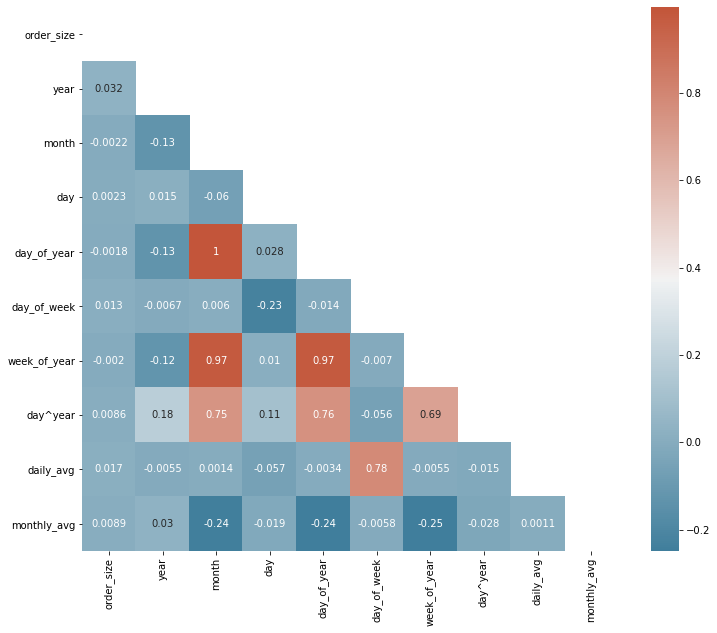

In [16]:
# create heatmap
f, ax = plt.subplots(figsize=(12, 10))

#masking top half
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# create heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [17]:
df_1.head()

,order_size,year,month,day,day_of_year,day_of_week,week_of_year,day^year,daily_avg,monthly_avg
0,0.4,2019,2,19,50,2,8,26.012973,0.665582,0.678177
1,0.2,2020,2,20,51,4,8,27.480608,0.670471,0.678177
2,0.5,2020,2,20,51,4,8,27.480608,0.670471,0.678177
3,0.2,2019,1,14,14,1,3,18.928349,0.659266,0.667206
4,0.6,2020,8,1,214,6,31,33.618934,0.663887,0.676901


In [18]:
df_2 = df.groupby('order_load_date').sum().reset_index()

In [19]:
#Transform data with new features
df_2 = date_features(df_2)

In [20]:
df_2

,order_size,year,month,day,day_of_year,day_of_week,week_of_year,day^year
0,45.37500,2018,12,31,365,1,1,31.957174
1,221.35570,2019,1,2,2,3,1,1.786909
2,254.63450,2019,1,3,3,4,1,6.206051
3,208.07718,2019,1,4,4,5,1,9.041815
4,226.09680,2019,1,5,5,6,1,11.080764
...,...,...,...,...,...,...,...,...
775,263.63500,2021,9,28,271,2,39,36.199845
776,286.02800,2021,9,29,272,3,39,36.213588
777,254.22700,2021,9,30,273,4,39,36.227271
778,233.87700,2021,10,2,275,6,39,36.254463


In [21]:
df_2 = df_2.rename(columns={'order_size':'total'})

In [22]:
# Daily Average, Monthly Average for train
df_2['daily_avg'] = df_2.groupby('day_of_week')['total'].transform('mean')
df_2['monthly_avg'] = df_2.groupby('month')['total'].transform('mean')

In [23]:
df_2.sort_values(by=['year','day'])

,total,year,month,day,day_of_year,day_of_week,week_of_year,day^year,daily_avg,monthly_avg
0,45.3750,2018,12,31,365,1,1,31.957174,211.253393,145.575734
24,163.5965,2019,2,1,32,5,5,23.783528,210.604226,211.288535
45,127.9120,2019,3,1,60,5,9,26.859077,210.604226,218.417103
66,200.2300,2019,4,1,91,1,14,28.669245,211.253393,209.620139
90,0.0000,2019,5,1,121,3,18,29.819612,225.923188,204.152380
...,...,...,...,...,...,...,...,...,...,...
777,254.2270,2021,9,30,273,4,39,36.227271,218.783329,208.633194
635,241.0610,2021,3,31,90,3,13,31.636242,225.923188,218.417103
680,280.7485,2021,5,31,151,1,22,33.898256,211.253393,204.152380
728,4.7000,2021,7,31,212,6,30,35.263305,111.336368,181.955145


In [24]:
df_2['shift_7'] = df_2['total'].shift(7)
df_2 = df_2.dropna()

In [25]:
# create correlation
corr_2 = df_2.corr()
corr_2

,total,year,month,day,day_of_year,day_of_week,week_of_year,day^year,daily_avg,monthly_avg,shift_7
total,1.000000,-0.071262,-0.118029,-0.055992,-0.122797,-0.291555,-0.096205,-0.084229,0.439090,0.215795,0.080261
year,-0.071262,1.000000,-0.173577,-0.028051,-0.175179,-0.001627,-0.164758,0.140160,-0.003213,0.079351,-0.113106
month,-0.118029,-0.173577,1.000000,-0.002787,0.996080,0.026094,0.963952,0.760385,-0.054714,-0.548807,-0.014783
day,-0.055992,-0.028051,-0.002787,1.000000,0.085349,-0.136141,0.057728,0.106449,0.160736,-0.013678,0.029944
day_of_year,-0.122797,-0.175179,0.996080,0.085349,1.000000,0.014174,0.965698,0.765187,-0.040289,-0.547489,-0.012885
day_of_week,-0.291555,-0.001627,0.026094,-0.136141,0.014174,1.000000,0.021867,-0.025538,-0.656202,-0.014945,0.106827
week_of_year,-0.096205,-0.164758,0.963952,0.057728,0.965698,0.021867,1.000000,0.698365,-0.050301,-0.514001,-0.022348
day^year,-0.084229,0.140160,0.760385,0.106449,0.765187,-0.025538,0.698365,1.000000,0.011759,-0.357235,0.064005
daily_avg,0.439090,-0.003213,-0.054714,0.160736,-0.040289,-0.656202,-0.050301,0.011759,1.000000,0.042728,0.021855
monthly_avg,0.215795,0.079351,-0.548807,-0.013678,-0.547489,-0.014945,-0.514001,-0.357235,0.042728,1.000000,0.115324


<AxesSubplot:>

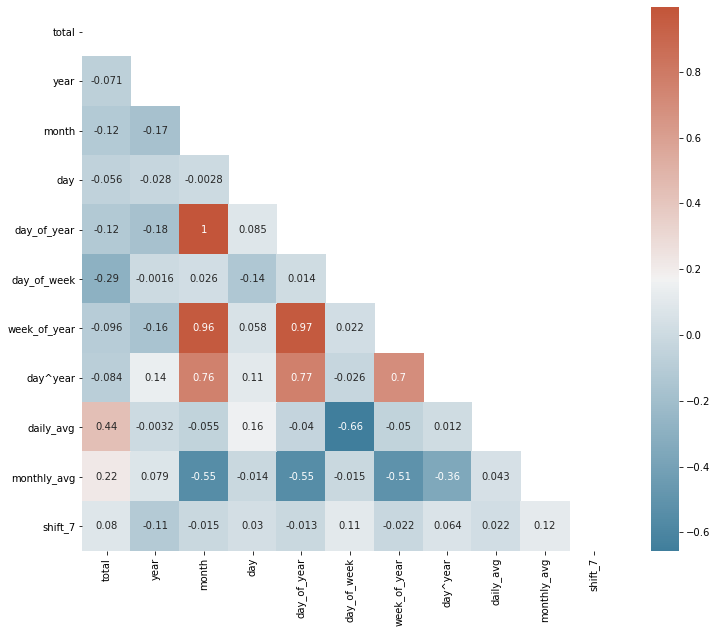

In [26]:
# create heatmap
f, ax = plt.subplots(figsize=(12, 10))

#masking top half
mask = np.triu(np.ones_like(corr_2, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# create heatmap
sns.heatmap(corr_2, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:xlabel='month', ylabel='total'>

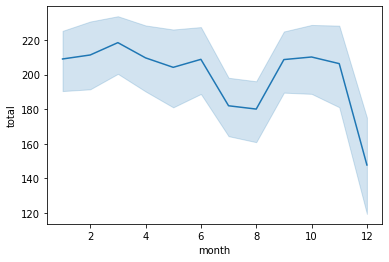

In [27]:
sns.lineplot(x='month', y='total', data=df_2)

<AxesSubplot:xlabel='month', ylabel='order_size'>

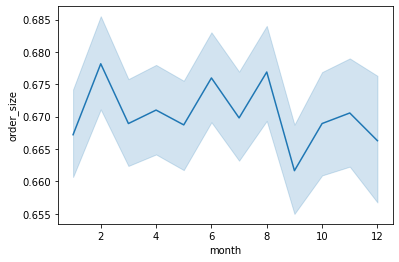

In [28]:
sns.lineplot(x='month', y='order_size', data=df_1)

In [29]:
df_2 = df_2.drop(['day_of_year', 'month'], axis=1)

In [30]:
# import train_test_split and StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# define the scaler
scaler = StandardScaler()

In [32]:
# Split dataset in train and test
X = df_2.drop('total',axis=1)
y = df_2['total']

In [33]:
df_2['day_of_week'] = df_2['day_of_week'].astype('int64')
df_2['week_of_year'] = df_2['week_of_year'].astype('int64')

In [34]:
# define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [35]:
X_test.shape

(155, 8)

In [36]:
# import XGB model
import xgboost as xgb

In [305]:
# set XGB Model
#matrix_train = xgb.DMatrix(X_train, label = y_train)
#matrix_test = xgb.DMatrix(X_test, label = y_test)

In [306]:
#model = xgb.train(params={'objective':'reg:squarederror','eval_metric':'mae'},
#            dtrain = matrix_train, 
 #           num_boost_round = 500, 
  #          early_stopping_rounds = 20, 
   #         evals = [(matrix_test,'test')])

In [307]:
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
  #              max_depth = 10, alpha = 10, n_estimators = 10)


In [308]:
#xg_reg.fit(X_train,y_train)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [309]:
#kfold = KFold(n_splits=10, random_state=7, shuffle=True)
#results = cross_val_score(xg_reg, X_train, y_train, cv=kfold)
#y_test_pred = xg_reg.predict(X_test)

#mse = mean_squared_error(y_test_pred, y_test)

#y_pred = xg_reg.predict(X_test)

In [38]:
# Create custom scorer for the model part I
from sklearn.metrics import make_scorer

In [39]:
# Create custom scorer for the model part II
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    
    distance = predict - actual
    
    square_distance = distance ** 2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score

In [40]:
# Create custom scorer for the model part III
rmse_score = make_scorer(rmse, greater_is_better=False)

In [41]:
# performing Grid Search
model = xgb.XGBRegressor()
param_search = {
    'eta': [0.1, 0.2, 0.3],
    'objective' :['reg:squarederror'],    
    'max_depth':[i for i in range(1,6)],
    'num_class':[i for i in range (1,4)]
}



In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_model = GridSearchCV(estimator=model, 
                       cv=5, 
                       param_grid = param_search, 
                       scoring = rmse_score,
                         verbose=0)

In [44]:
grid_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 578, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 500, in __init__
    handle, feature_names, feature_types = dispa

NotFittedError: All estimators failed to fit

In [45]:
grid_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [379]:
y_pred = grid_model.predict(X_test)

In [381]:
np.sqrt(mean_squared_error(y_test, y_pred))

145.04036812957614

In [46]:
import sklearn.metrics as metrics

In [47]:
def regression_results(y_true, y_pred):
    #regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('explained variance :',round(explained_variance,4))
    print('mean squared log error :', round(mean_squared_log_error,4))
    print('r2 :',round(r2,4))
    print('MAE :',round(mean_absolute_error,4))
    print('MSE :',round(mse,4))
    print('RMSE :',round(np.sqrt(mse),4))

In [48]:
regression_results(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [50]:
df_2.to_csv('featured_data.csv', index=False)

In [64]:
model3 = xgb.XGBRegressor(n_estimators=500, 
                        learning_rate = 0.01,
                         eval_metric='mae')

In [59]:
X_3 = df_2.drop('total',axis=1)
y_3 = df_2['total']

In [60]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=123)

In [65]:
model3.fit(X_train3, y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_preds3 = model3.predict(X_test3)

In [70]:
metrics.r2_score(y_test3, y_preds3)

0.6516542847641094

In [69]:
metrics.mean_absolute_error(y_test3, y_preds3)

33.66651890837735